# ThermoBuilPy - Basic Excample

In [31]:
# Package Import
from ThermoBuilPy import *

#### Model Assumptions
The following assumptions are used for the calculations:
- the density and specific heat coefficients remain constant at all temperatures;
- the masses and total capacities of the discrete heat storage/thermal capacities must remain constant. If a certain mass flow enters a storage capacity, an equally large mass flow must leave it.

#### Units
This package does not come with a specific set of units that have to be used.
Instead the base units are set by the user. The only condition is that the units have to match. 
Two possible sets of units could be:
- energy:        J
- time:          s
- mass:          kg
- temperature:   °C

Combined units:
- c_p:           J/(kg*K)
- mass flow: kg/s
- power:         J/s=W

Second set:
- energy:        kWh
- time:          h
- mass:          kg
- temperature:   °C

Combined units:
- c_p:           kWh/(kg*K)
- mass flow: kg/h
- power:         kW

Unit of temperature:
The unit of temperature is also not set by the package. As only temperature differences between storages are used for the calculations, either Kelvin or degree Celsius can be used.

In [32]:
CP_WATER = 4182 # J/(kg*K)

## Definition of Thermal Storages / Capacities

#### Definition of capacity by absolute capacity

In [33]:
cap1 = ThermalStorage.newStorage(cap=1000,temp=30,name='Capacity 1')

#### Definition of capacity by mass

In [34]:
cap2 = ThermalStorage.newStorageByMass(mass=1,cp=CP_WATER,temp=50,name='Capacity 2')

#### Usage of names
When creating new objects, individual names can be assigned using the 'name' attribute. This is not mandatory, however. If no name is provided, a unique name will be generated automatically.

## Definition of a Conduction
Conduction always takes place between two thermal storage units. The order in which the two capacities are given determines the sign of heat transfer.

In [35]:
cond1 = Conduction.newConduction(storage1=cap1,storage2=cap2,coeff=100)

## Definition of a Thermal System
To calculate a thermal system, it must first be defined with all associated capacities and types of heat transfer. To do this, a ThermalSystem object is created and the various objects are submitted in a list.

In [36]:
ts = ThermalSystem.newThermalSystem(storages=[cap1,cap2],
                                    conductions=[cond1])

## Calculation of a time series

In [37]:
ts.simulate(num_steps=100,stepsize=1)

## Using and plotting the results

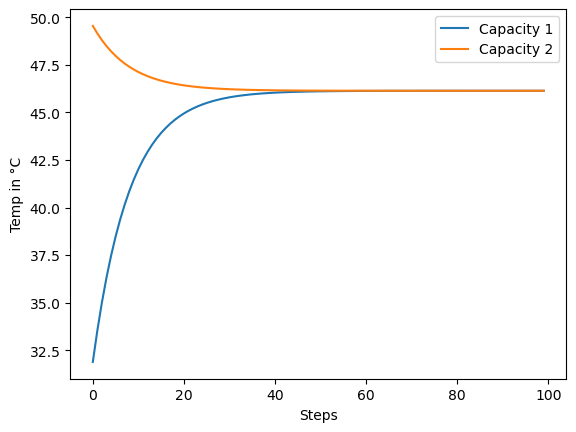

In [41]:
cap1_temp_res = cap1.get_temp_res()
cap2_q_res = cap2.get_Q_res()
ts.plot_temps([cap1,cap2])

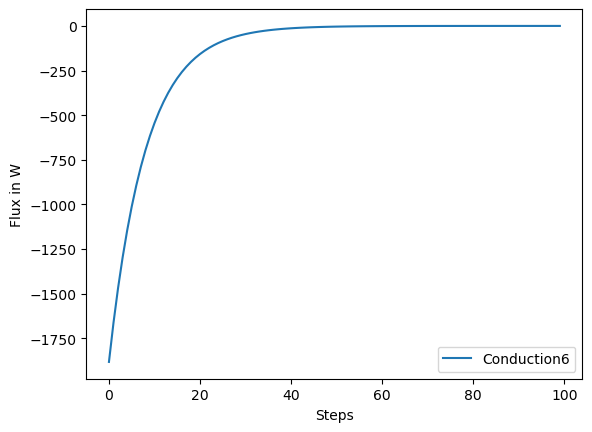

In [40]:
cond1_heatflow = cond1.get_heatflow_res()
ts.plot_heatflow([cond1])